In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import os

In [39]:
def write_submission_file(prediction, filename,
                          path_to_sample=os.path.join('SampleSubmission.csv')):
    submission = pd.read_csv(path_to_sample, index_col='Order_No')
    
    submission['Time from Pickup to Arrival'] = prediction
    submission.to_csv(filename)

In [40]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# the datset

In [41]:
train = pd.read_csv('x_tarin.csv') 
x_test = pd.read_csv('x_test.csv') 

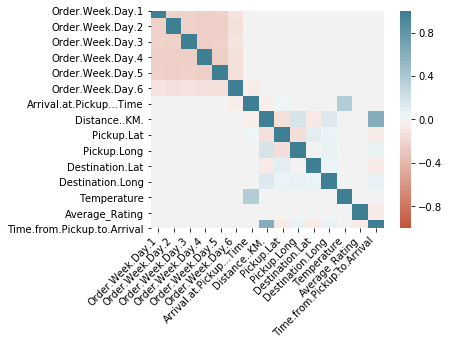

In [42]:

corr=train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

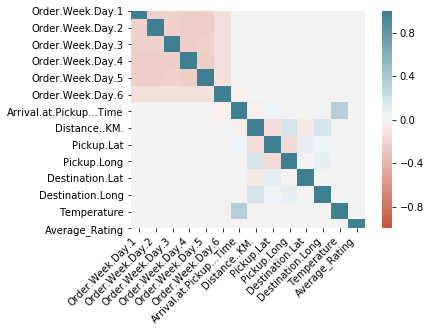

In [45]:
corr=x_test.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [46]:
train.columns

Index(['Order.Week.Day.1', 'Order.Week.Day.2', 'Order.Week.Day.3',
       'Order.Week.Day.4', 'Order.Week.Day.5', 'Order.Week.Day.6',
       'Arrival.at.Pickup...Time', 'Distance..KM.', 'Pickup.Lat',
       'Pickup.Long', 'Destination.Lat', 'Destination.Long', 'Temperature',
       'Average_Rating', 'Time.from.Pickup.to.Arrival'],
      dtype='object')

In [47]:
x_train=train.drop(columns='Time.from.Pickup.to.Arrival',axis = 1)
y_train = train['Time.from.Pickup.to.Arrival']

In [49]:
x_train.describe()

,Order.Week.Day.1,Order.Week.Day.2,Order.Week.Day.3,Order.Week.Day.4,Order.Week.Day.5,Order.Week.Day.6,Arrival.at.Pickup...Time,Distance..KM.,Pickup.Lat,Pickup.Long,Destination.Lat,Destination.Long,Temperature,Average_Rating
count,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.000000,20222.00000,20222.000000
mean,0.178716,0.187222,0.179409,0.199189,0.189249,0.057215,47383.688804,9.668826,-1.281285,36.811166,-1.282665,36.811351,23.21189,13.892647
std,0.383124,0.390099,0.383704,0.399400,0.391716,0.232259,9138.381338,5.662565,0.030665,0.037871,0.035197,0.045180,3.22689,0.909215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25542.000000,1.000000,-1.438302,36.653621,-1.430298,36.606594,11.20000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39919.000000,5.000000,-1.300921,36.783395,-1.301446,36.785426,21.30000,13.700000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47013.000000,8.000000,-1.279395,36.806603,-1.284652,36.808128,23.21189,14.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54628.000000,13.000000,-1.257147,36.828900,-1.261091,36.829351,25.20000,14.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83400.000000,45.000000,-1.147170,36.991046,-1.030225,37.016779,32.10000,15.200000


In [50]:
y_train.describe()

count    20222.000000
mean      1521.639897
std        856.417551
min        181.000000
25%        871.000000
50%       1341.000000
75%       2009.000000
max       4067.000000
Name: Time.from.Pickup.to.Arrival, dtype: float64

# model creation

In [51]:
ridge = Ridge(alpha=0.01, normalize = True, random_state=42)

In [52]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [53]:
print(len(X_train_part),len(X_valid),len(y_train_part),len(y_valid))


14155 6067 14155 6067


In [54]:
ridge.fit(X_train_part, y_train_part)
ridge_valid_pred = ridge.predict(X_valid)
#In case delivery time is forecasted negative
ridge_valid_pred[ridge_valid_pred < 0] = 0

In [55]:
#On the leaderboard 785.648
rmse(y_valid, ridge_valid_pred)

677.7493577046415

# ### Model training and submission creation

In [56]:
ridge.fit(x_train, y_train)
ridge_prediction = ridge.predict(x_test)

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())


                                 OLS Regression Results                                
Dep. Variable:     Time.from.Pickup.to.Arrival   R-squared:                       0.384
Model:                                     OLS   Adj. R-squared:                  0.383
Method:                          Least Squares   F-statistic:                     898.2
Date:                         Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                                 12:24:08   Log-Likelihood:            -1.6036e+05
No. Observations:                        20222   AIC:                         3.207e+05
Df Residuals:                            20207   BIC:                         3.209e+05
Df Model:                                   14                                         
Covariance Type:                     nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/home/moussa/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
print(len(ridge_prediction),len(x_test))

7068 7068


In [58]:
write_submission_file(prediction=ridge_prediction, filename='encore.csv')

# KNN

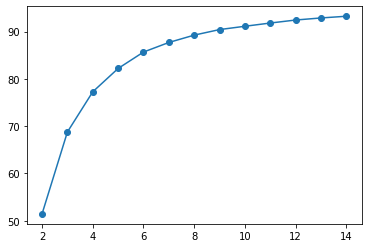

In [60]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train_part, y_train_part).score(X_train_part, y_train_part)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [61]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_part, y_train_part)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [62]:
print("score:",1-knn.score(X_train_part, y_train_part))

score: 0.5143765453903215


In [63]:
# On récupère les prédictions sur les données test
predicted = knn.predict(x_test)
print(len(predicted),len(y_valid))

7068 6067


In [35]:
write_submission_file(prediction=predicted, filename='encore1.csv')